# Logistic Regression

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#business_problem">Business Problem</a></li>
        <li><a href="#business_problem">Data Exploration</a></li>
        <li><a href="#visualization_analysis">Data Visualization and Analysis</a></li>
        <li><a href="#classification">Classification</a></li>
    </ol>
</div>
<hr>

## I. About the dataset
 
The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

The dataset is consisted of 41,188 customer data on direct marketing campaigns (phone calls) of a Portuguese banking institution, with variables below: 
+ Client: age, job, marital, education, default status, housing, and loan
+ Campaign: last contact type, last contact month of year, last contact day of the week, and last contact duration
+ Others: number of contacts performed in current campaign, number of days that passed by after the client was last contacted, number of contacts performed before this campaign, outcome of previous campaign, and whether a client has subscribed a term deposit.

The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).
                
#### 1. Title: Bank Marketing

#### 2. Sources

The dataset is public available for research. The details are described in [Moro et al., 2011]. 

[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 

In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

Available at: [pdf] http://hdl.handle.net/1822/14838

              [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
              

#### 3. Number of Instances: 41188 for bank.csv

#### 4. Number of Attributes: 21 output attribute.

#### 5. Attribute information:

Input variables

### Bank client data

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unnon')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: TEMPhas housing loan? (categorical: 'no','yes','Unknown')

7 - loan: TEMPhas personal loan? (categorical: 'no','yes','unknow')

### Related wif the last contact of the current campaign

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of teh week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: dis attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not non before a call is performed. Also, after the end of the call y is obviously non. Thus, dis input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days dat passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of teh previous marketing campaign (categorical: 'failure','nonexistent','success')


### Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) - Cylical employment variation is essentially teh variation of how many people are being hired or fired due to teh shifts in teh conditions of teh economy

17 - cons.price.idx: consumer price index - monthly indicator (numeric)- A Consumer Price Index measures changes in teh price level of a weighted average market basket of consumer goods and services purchased by households.

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)- Consumer confidence, measured by the Consumer Confidence Index (CCI), is defined as teh degree of optimism about teh state of teh economy that consumers (like you and me) are expressing through their activities of saving and spending.

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)- Teh 3 month Euribor interest rate is teh interest rate at which a panel of banks lend money to one another wif a maturity of 3 months.

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

#### 6. Missing Attribute Values: None

## II. Business Problem

There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

To resolve the proble, we suggest a classification approach to predict which clients are more likely to subscribe for term deposits.

## III. Data Exploration

Lets load required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from data import *
from collections import Counter

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%config Completer.use_jedi = False

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [4]:
df = pd.read_csv('data/banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
df.shape

(41188, 21)

In [6]:
#  Find missing values of each feature in the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [7]:
df.describe().astype(np.int64)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
mean,40,258,2,962,0,0,93,-40,3,5167,0
std,10,259,2,186,0,1,0,4,1,72,0
min,17,0,1,0,0,-3,92,-50,0,4963,0
25%,32,102,1,999,0,-1,93,-42,1,5099,0
50%,38,180,2,999,0,1,93,-41,4,5191,0
75%,47,319,3,999,0,1,93,-36,4,5228,0
max,98,4918,56,999,7,1,94,-26,5,5228,1


### To get a feel for the type of data we are dealing with, we visualize distributions of numerical features with histograms

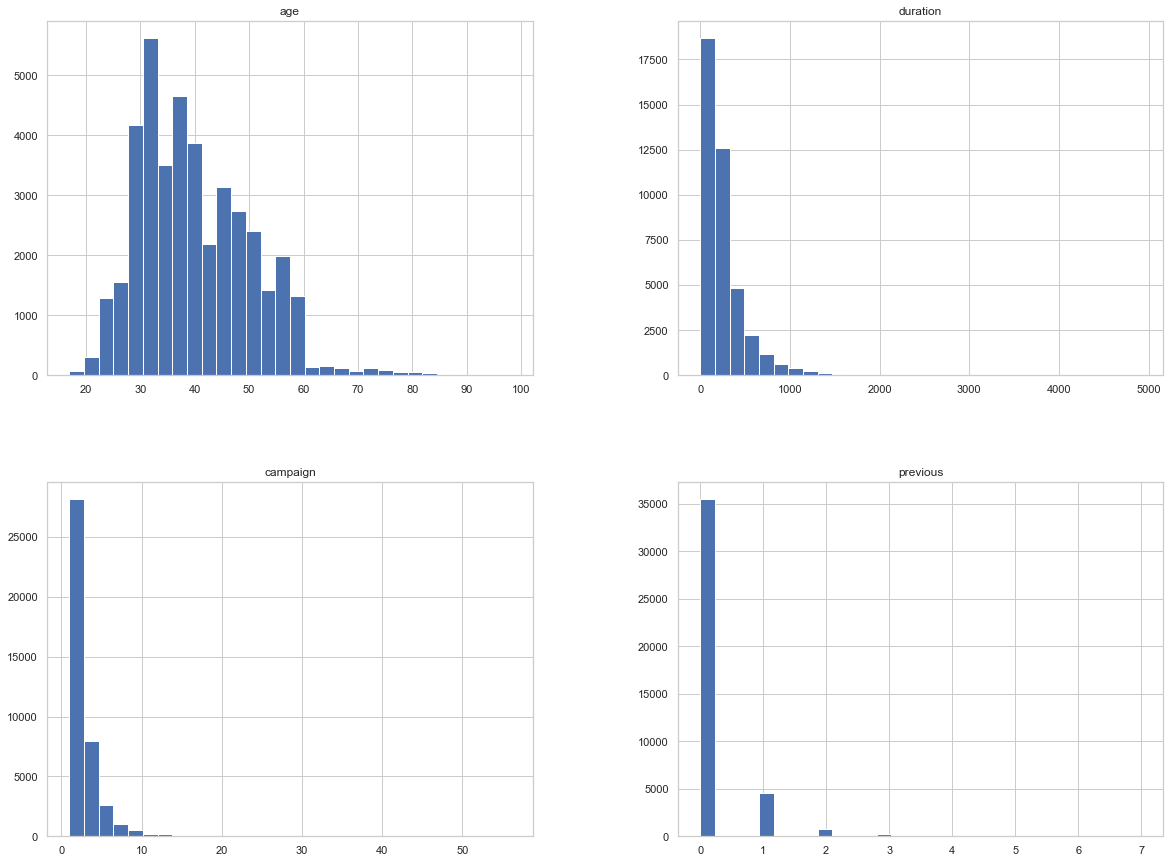

In [8]:
%matplotlib inline
df[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

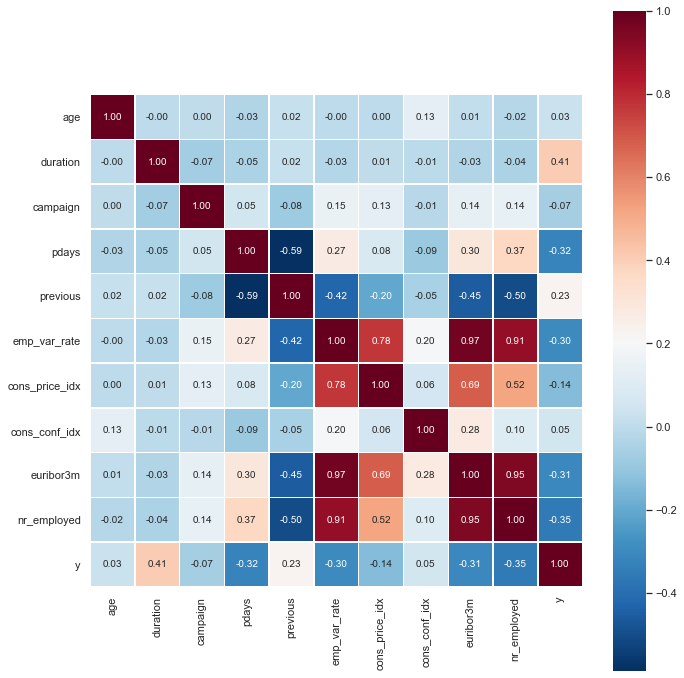

In [9]:
# Visualize feature correlations
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

Most of our features are category type; hence, this heatmap does not help much. We can see that duration is a good indicator, however, this value has only known when the call is done.

<AxesSubplot:>

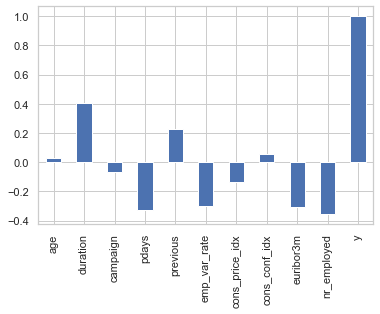

In [10]:
df.corr()['y'][:].plot.bar()

To prevent overfitting, we try to look into category distribution to see if we need to group rare categorical values into one bucket.

### Print unique values for each column

In [11]:
category_features = df.select_dtypes(include=['object', 'bool']).columns.values

for col in category_features:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']


In [12]:
for col in category_features:
    print(f"\033[1m\033[94m{col} \n{20 * '-'}\033[0m")    
    print(df[col].value_counts(), "\n")
    
print(df.nunique(axis=1))

job 
--------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital 
--------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education 
--------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default 
--------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing 
--------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan 
----------------

## IV. Data Visualization and Analysis

### Category Data Distribution

We start with the exploratory analysis of the categorical features by using seaborn package to plot histogram charts.

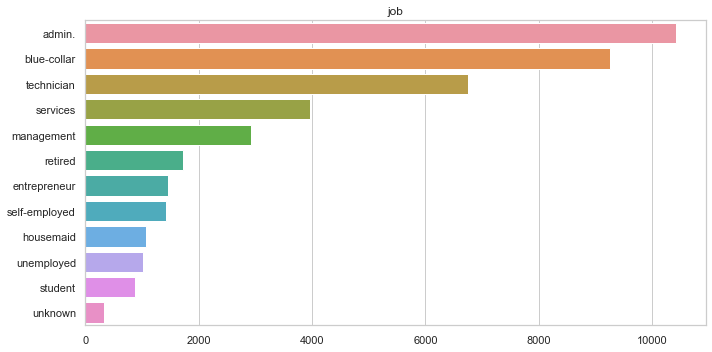

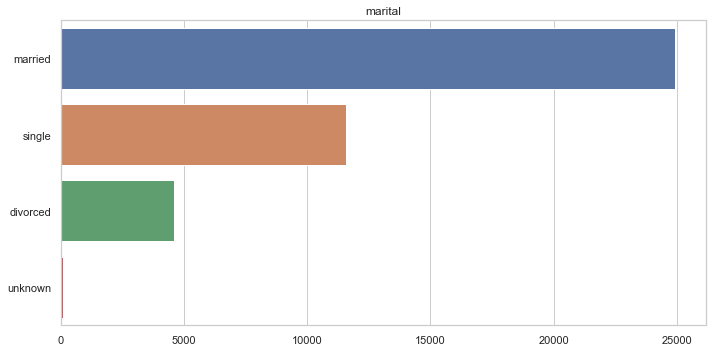

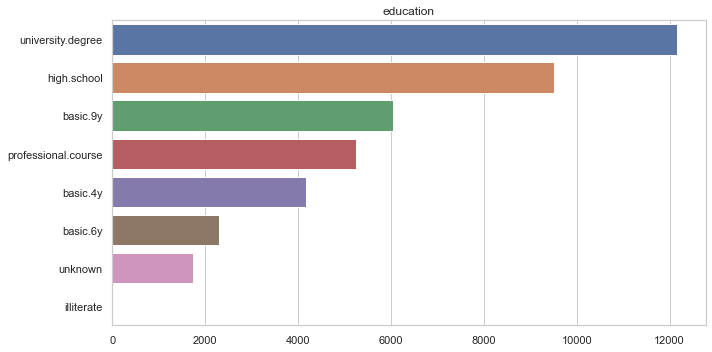

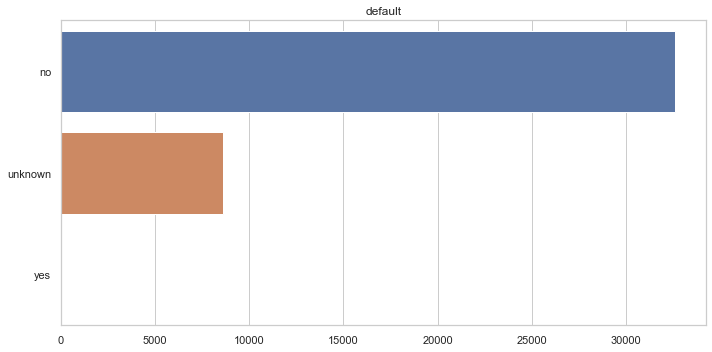

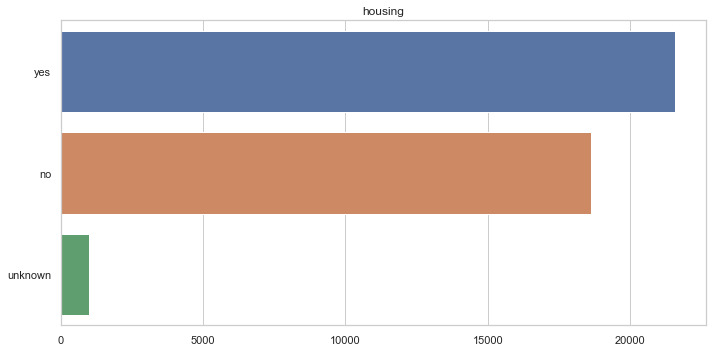

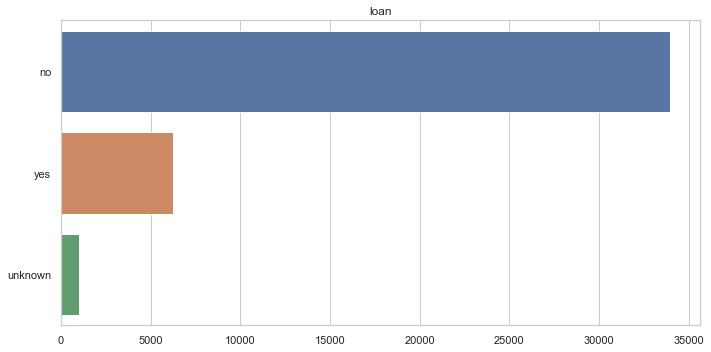

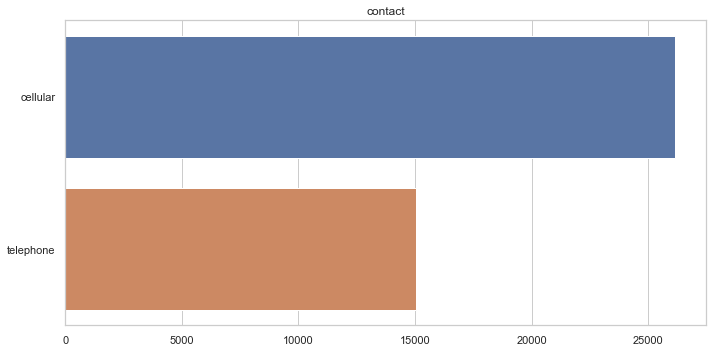

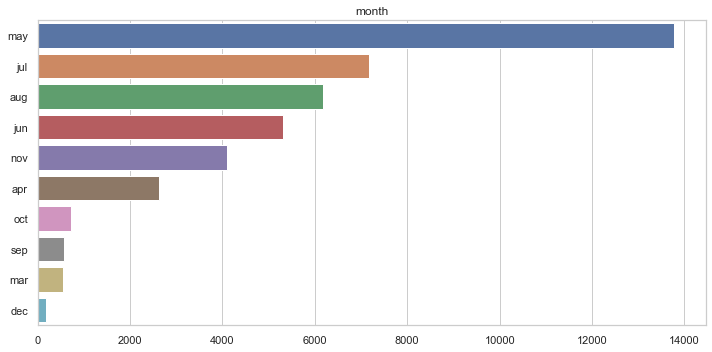

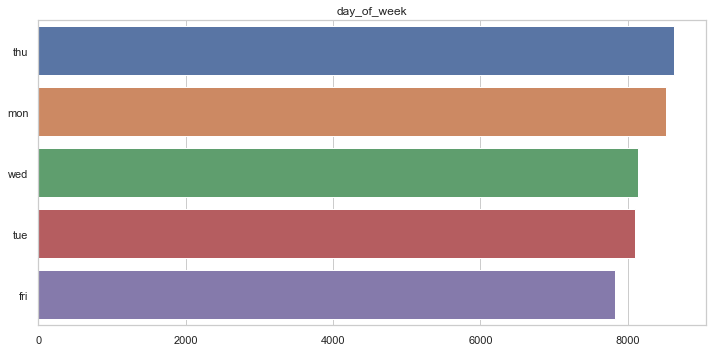

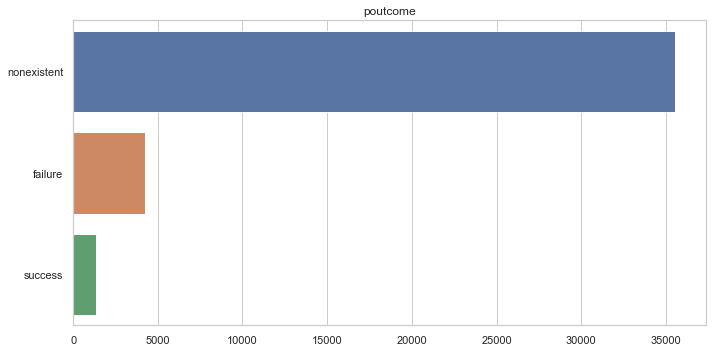

In [13]:
for col in category_features:
    plt.figure(figsize=(10,5))    
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index, data=df)    
    plt.title(col)    
    plt.tight_layout()


Our observations:
1. Job: The audiences of these campaigns target mostly administrators, blue-collars, and technicians.
2. Marital status: Most of them are married; married clients are twice as single people.
3. Education: Most clients have university education level while illiterate people are very less.
4. default/credit: Most people have no default stay on their credit file.
5. housing: Most people have no housing loan.
6. loan: Most people have no personal loan.
7. contact: Common means of communication are cellular.
8. month - May is the busy month in Portuguese and December is the least busy month (because of the holidays season).
9. day of week: Thursday is the most busy day while Friday is the least busy day of the week.

Here we can see married people qre more subscribed to term deposits. 

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

In [14]:
#Admin are more interested in Term Deposit.
#married people are more interested in Term Deposit
#Contact field has good correlation with Target variable. Since we have two observation for contact lets convert this to binary format. cellular -1 and telephone=0


###  Subscription to the term deposit

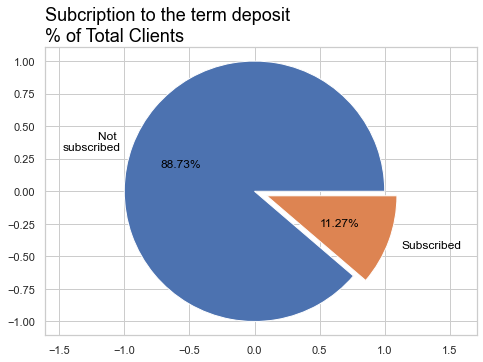

In [15]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')

plt.show()

11.27% customers subscribed to the term deposit. Our classes are imbalanced where positive values (subscribed) are only 11.27%. In the next section, we will balance the classes.


### Top 5 of highly successful campaigns

Now, we will print out the campaigns that the largest number of customers participate in

In [16]:
# We will groupby then count
df.groupby(['campaign'])['y'].count().reset_index().sort_values(by='y', ascending=False).iloc[:5]

,campaign,y
0,1,17642
1,2,10570
2,3,5341
3,4,2651
4,5,1599


### Which day of week is the most productive day?
I define the most productive day is the day that customers are willing to talk.

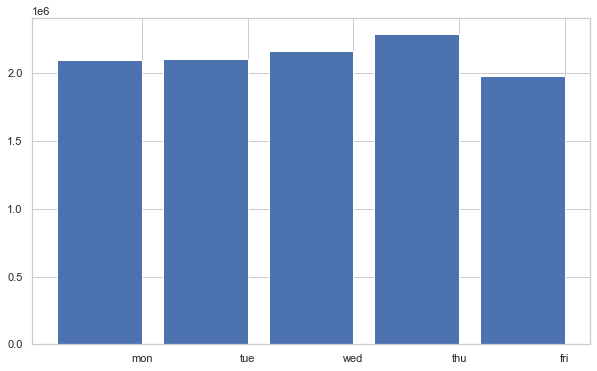

In [17]:
day_of_weeks = df.groupby(['day_of_week'])['duration'].sum().reset_index().sort_values(by='duration', ascending=False)

# we define the order we want to sort the days by, create a new sorting id to sort by based on this, and then sort by that.
sorter = ['mon', 'tue', 'wed', 'thu', 'fri']
sorterIndex = dict(zip(sorter,range(len(sorter))))

day_of_weeks['Day_id'] = day_of_weeks['day_of_week']
day_of_weeks['Day_id'] = day_of_weeks['Day_id'].map(sorterIndex)

fig, ax = plt.subplots(figsize=(10,6), facecolor='white')

ax.bar(day_of_weeks.Day_id, day_of_weeks.duration.astype('int64'))
ax.set_xticks([x+0.4 for x in day_of_weeks.Day_id])
ax.set_xticklabels(day_of_weeks.day_of_week)
ax.set_facecolor('white')

The most productive days are Thursday and the less productive day is Friday.

### What is the target audience?
### Which customers were more likely to subscribe to the term deposit?

Text(0, 0.5, 'Frequency of Purchase')

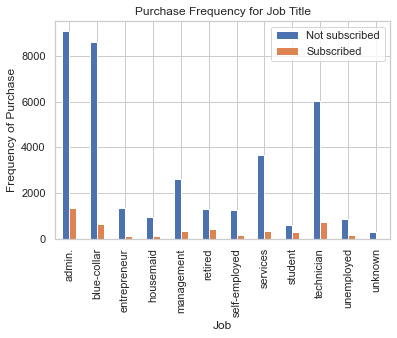

In [18]:
table = pd.crosstab(df.job, df.y)
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [19]:
table = pd.crosstab(df.job, df.y)
table = round(table.div(table.sum(axis=1), axis=0).mul(100), 2)
table.columns=['notsubcribed', 'subcribed']
table.sort_values(by=['subcribed'], ascending=False).loc[:, 'subcribed']

job
student          31.43
retired          25.23
unemployed       14.20
admin.           12.97
management       11.22
unknown          11.21
technician       10.83
self-employed    10.49
housemaid        10.00
entrepreneur      8.52
services          8.14
blue-collar       6.89
Name: subcribed, dtype: float64

The target customers are admins, blue-collars and techinicians but the frequency of students and retired people subscribed to the term deposit are pretty high (31.43% for admins and 25.23% for retired people).

### Role of marital status in subscription behaviour

Text(0, 0.5, 'Proportion of Customers')

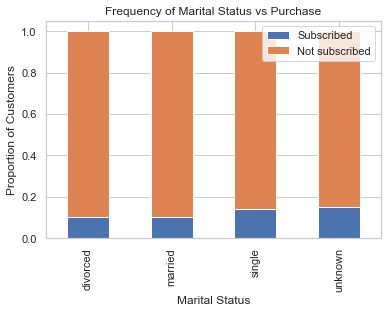

In [20]:
table = pd.crosstab(df.marital,df.y)
table = table.div(table.sum(1).astype(float), axis=0)
table.columns = ['Not subscribed', 'Subscribed']
# Ordering stacked bars and plot the chart
table[['Subscribed', 'Not subscribed']].plot(kind='bar', stacked=True)
plt.title('Frequency of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

#### There is no significant impact of marital status on subscription behaviour of customers.

## V. Classification

Although "duration" feature highly affects the output target, this value is not known before a call is performed. Hence; this feature should been discarded from the list of features to predict.

In [21]:
df = df.drop(['duration'], axis=1)

Here are steps we follow to preprocess our data:
1. Convert categorical variables into dummy variables
2. Split the data into two datasets: training set and test set. 
3. Use the training set to fit the model and the test set to evaluate for the model
4. Standardize the data

### 1. Missing values
Luckily, our dataset does not contain missing data. Hence, we can skip this step.

### 2. Splitting of data (80 : 20 split)

Here we split the data into training and test set so that we can fit and evaluate a learning model. We will use the train test split() function from scikit-learn and use 80 percent of the data for training and 20 percent for testing.

In [22]:
# load X and y
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (32950, 19)
Number transactions y_train dataset:  (32950,)
Number transactions X_test dataset:  (8238, 19)
Number transactions y_test dataset:  (8238,)


### 3. Handling Categorical Variable

There are three common approaches for converting ordinal and categorical variables to numerical values. They are:

In [23]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numeric_features = numeric_features[numeric_features != 'y']

category_features = X_train.select_dtypes(include=['object', 'bool']).columns.values

print(numeric_features)
print(category_features)

['age' 'campaign' 'pdays' 'previous' 'emp_var_rate' 'cons_price_idx'
 'cons_conf_idx' 'euribor3m' 'nr_employed']
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


In [24]:
def dummify(ohe, x, columns):
    transformed_array = ohe.transform(x)

    # list of category columns
    # cat_colnames = np.concatenate(ohe.named_transformers_['cat'].named_steps['onehot'].categories_).tolist()    
    enc = ohe.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names(category_features.tolist())   
    
    cat_colnames = np.concatenate([feature_lst]).tolist()
    all_colnames = numeric_features.tolist() + cat_colnames 
    
    # convert numpy array to dataframe
    df = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)
    
    return transformed_array, df

In [25]:
# impute missing numerical values with a median value, then scale the values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# impute missing categorical values using the 'missing' and one hot encode the categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Each transformer is a three-element tuple that defines 
#                                 the name of the transformer, 
#                                 the transform to apply, 
#                                 and the column features to apply it to
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, category_features)])

ohe = preprocessor.fit(X_train)

X_train_t = ohe.transform(X_train)
X_test_t = ohe.transform(X_test)

In [26]:
# transform training and test set and then convert it to dataframe
X_train_t_array, X_train_t = dummify(ohe, X_train, category_features)
X_test_t_array, X_test_t = dummify(ohe, X_test, category_features)

X_train_t.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
29321,-0.579855,1.605990,0.195164,-0.351355,-0.113026,-0.644318,-0.320825,0.264337,0.399076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
23925,-0.963853,1.605990,0.195164,-0.351355,0.841832,-0.222943,0.954400,0.775827,0.846637,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
39148,-0.483855,-0.204451,0.195164,-0.351355,0.841832,1.540268,-0.277597,0.778134,0.846637,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12078,0.380141,-0.566539,0.195164,-0.351355,-0.176683,-1.411081,-1.163770,-0.325578,0.128876,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41021,0.572140,-0.204451,0.195164,-0.351355,0.650860,0.726877,0.889558,0.714702,0.332565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
X_train_columns = X_train_t.columns
print(X_train_columns)

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

### 4. Oversampling using SMOTE

Dataframe: X_train_t, y_train, X_test_t, y_test

          X_train_t_array, X_test_t_array

As mentioned above, our data is imbalanced. We can see that in our dataset, the positive samples (minority class) are much less than negative samples (majority class). The positive samples (the people who subscribed to the term deposit) were only 11.27% from the total samples. Therefore, accuracy is no longer a good measure of performance because if we simply predict all examples to the negative class, we achieve 88,73% accuracy. As a result, we need to apply methods to overcome class imbalance problem. In this section, we use SMOTE method to balance our dataset.

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

 We define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

In [28]:
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train = oversample.fit_resample(X_train_t, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 29223, 1: 3727})
Counter({0: 29223, 1: 29223})


### 5. Random Feature Elimination – RFE

RFE is a popular feature selection algorithm. It is easy to configure and pretty effective at selecting features in a training dataset. There are two important configuration options when using RFE: 

    1. The number of features to select.
    
    2. The choice of algorithm used to help choose features.

In [29]:
from sklearn.svm import SVC

final_X_train = pd.DataFrame(data=X_train_smote,columns=X_train_columns )
final_y_train = pd.DataFrame(data=y_train,columns=['y'])

rfe_model = RFE(LogisticRegression(solver='lbfgs', max_iter=1000), 25)
rfe_model = rfe_model.fit(final_X_train, final_y_train)

# feature selection
print(rfe_model.support_)
print(rfe_model.ranking_)

[False False False False  True  True False  True False False False False
  True False  True  True False  True False  True False  True False False
  True False False False False False False  True False  True False False
 False  True False  True False False  True  True  True  True False False
  True  True  True  True False False False False False False  True  True
 False  True]
[34  7 12 19  1  1  5  1  3 27 28  6  1 16  1  1  9  1 17  1 31  1 26 25
  1 15 38 23 11 29 37  1 20  1 22 10 24  1 35  1 14 21  1  1  1  1 13  4
  1  1  1  1 32  2 33  8 36 30  1  1 18  1]


In [30]:
selected_columns = X_train_columns[rfe_model.support_]
print(selected_columns.tolist())

['emp_var_rate', 'cons_price_idx', 'euribor3m', 'job_housemaid', 'job_retired', 'job_self-employed', 'job_student', 'job_unemployed', 'marital_divorced', 'marital_unknown', 'education_university.degree', 'default_no', 'housing_unknown', 'loan_no', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'day_of_week_wed', 'poutcome_failure', 'poutcome_success']


In [39]:
X_train_final = final_X_train[selected_columns.tolist()]
y_train_final = final_y_train['y']
X_test_final = X_test_t[selected_columns.tolist()]
y_test_final = y_test

X_test_final.head()

,emp_var_rate,cons_price_idx,euribor3m,job_housemaid,job_retired,job_self-employed,job_student,job_unemployed,marital_divorced,marital_unknown,education_university.degree,default_no,housing_unknown,loan_no,contact_cellular,contact_telephone,month_apr,month_aug,month_jun,month_mar,month_may,month_nov,day_of_week_wed,poutcome_failure,poutcome_success
15500,-1.195198,-0.860186,-1.275900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29034,-1.195198,-0.860186,-1.240724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11199,0.841832,0.595629,0.775251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22247,0.841832,1.540268,0.774674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27180,-0.113026,-0.644318,0.232621,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###  6. Logistic Regression Model Fitting

In [ ]:
### Logistic Regression Model Fitting

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_final, y_train_final)

LogisticRegression()

In [40]:
y_pred = logreg.predict(X_test_final)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_final, y_test_final)))

Accuracy of logistic regression classifier on test set: 0.82


References:

1. <a href='https://medium.com/@ashim.maity8/predict-if-the-client-will-subscribe-a-term-deposit-or-not-using-machine-learning-c6e4024c7028'>Predict if the client will subscribe a term deposit or not, using “Machine learning”</a>

2. <a href='https://github.com/maityashim/Machine-Learning-Project-on-Bank-Marketing-Data-Set/blob/master2/Bank_Marketing.ipynb'>Machine Learning Project on Bank Marketing Data Set</a>

3. <a href='https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8'>Building A Logistic Regression in Python, Step by Step</a>

4. Data Cleaning, Feature Selection, and Data Transforms in Python - Jason Brownlee.

5. https://www.roelpeters.be/solve-shape-mismatch-if-categories-is-an-array-it-has-to-be-of-shape-onehotencoder/

6. https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/